# S12 T01: Pipeline, grid search and text mining
___
## - Exercise 1
Take the set of data you want and perform a pipeline and a gridsearch applying the Random Forest algorithm.



In [4]:
#Import the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#ML libraries
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import set_config
#Nltk libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string
from wordcloud import WordCloud
#Warnings
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ignaciourzaizzuain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ignaciourzaizzuain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


___

## Dataset info:

Features: The dataset contains 6 features in 6 columns, which are the measured parameters of the different sensors. These correspond to the vibrations detected in the rocket.

Target: The target corresponds to the label that classifies the types of states of the rocket according to the features measured by the sensors.

- Target 0 corresponds to Stable

- Target 1 corresponds to Light Turbulence

- Target 2 corresponds to Moderate Turbulence

- Target 3 corresponds to Severe Turbulence

- Target 4 corresponds to Extreme Turbulence


___

## Exploratory Analysis EDA

In [5]:
#Import the DataSet:
df= pd.read_csv('space_X_train.csv', index_col=0)
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [6]:
#Some statics from our Data Set:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
sensor_1,2100.0,-0.20,1.54,-6.68,-1.17,-0.44,0.89,4.57
sensor_2,2100.0,0.20,1.61,-5.38,-0.88,0.32,1.32,6.70
sensor_3,2100.0,-0.38,1.45,-6.15,-1.37,-0.44,0.66,4.16
sensor_4,2100.0,-0.21,1.44,-5.65,-1.26,-0.18,0.87,4.37
sensor_5,2100.0,-0.19,1.50,-5.91,-1.21,-0.20,0.85,5.07
sensor_6,2100.0,-0.43,1.19,-4.43,-1.13,-0.41,0.35,4.02
target,2100.0,1.98,1.41,0.00,1.00,2.00,3.00,4.00


In [78]:
#Print the median of each sensor
print(df.sensor_1.median())
print(df.sensor_2.median())
print(df.sensor_3.median())
print(df.sensor_4.median())
print(df.sensor_5.median())
print(df.sensor_6.median())


-0.44386787866446814
0.32050658248880415
-0.43974504826938454
-0.17650414476250792
-0.19575117633231745
-0.4067539238511173


In [7]:
#Information and type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_1  2100 non-null   float64
 1   sensor_2  2100 non-null   float64
 2   sensor_3  2100 non-null   float64
 3   sensor_4  2100 non-null   float64
 4   sensor_5  2100 non-null   float64
 5   sensor_6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 131.2 KB


In [8]:
#Check the null values:
df.isnull().sum()

sensor_1    0
sensor_2    0
sensor_3    0
sensor_4    0
sensor_5    0
sensor_6    0
target      0
dtype: int64

In [9]:
#We count how many records we have for each target
total_classes= df['target'].value_counts()
total_classes

0    427
3    426
1    423
2    419
4    405
Name: target, dtype: int64

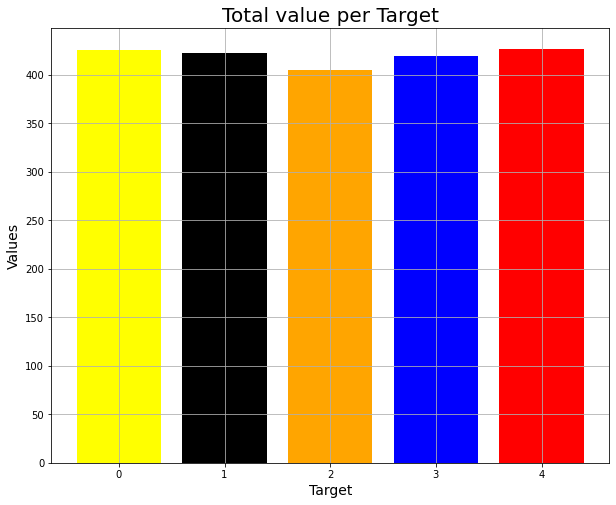

In [10]:
#Plot the total values of each target
fig = plt.figure(figsize=(10,8))

#Set colors of each bar
c = ['red', 'yellow', 'black', 'blue', 'orange']

plt.bar(df['target'].unique(), total_classes,label= "target",color=c)

plt.title("Total value per Target",fontsize=20)

plt.ylabel("Values", fontsize=14)
plt.xlabel("Target", fontsize=14)

plt.grid()
plt.show()

As the graph shows our classes are balanced, we have almost equal number of records for each target.

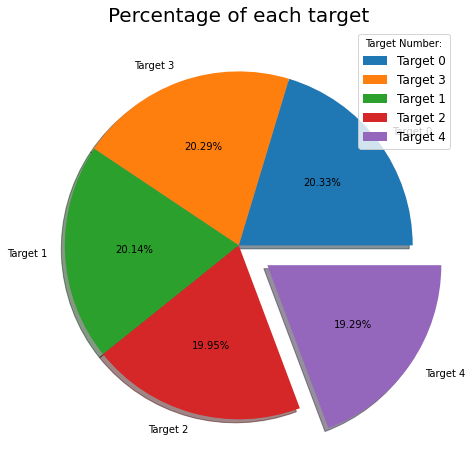

In [11]:
#Donut Chart with the total of each target.
plt.figure(figsize=(8,8))
labels = ["Target 0", "Target 3", "Target 1", "Target 2", "Target 4"]
explode = [0, 0 , 0, 0, 0.2]
plt.pie(total_classes, labels = labels, autopct='%.2f%%', explode=explode, shadow=True)

plt.title("Percentage of each target",fontsize=20)
plt.legend(title= "Target Number:", fontsize=12, loc="best")

plt.show()

Here we can see very clear how our classes are balanced and distributed, although we will see later which form of preprocessing we will use to treat the values.

___

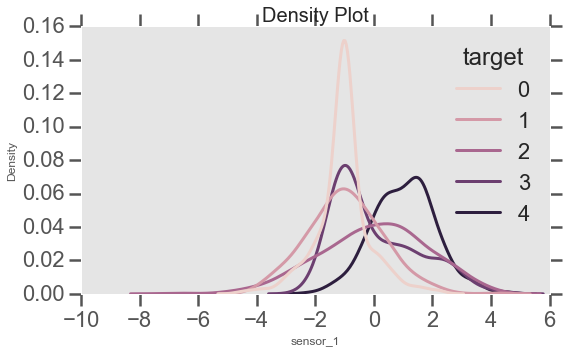

In [79]:
#We will plot a Density Plot to see the distribution of the data for each insect with respect to the recording time:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="sensor_1", hue="target")
plt.title("Density Plot",fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()

Here we can see that the distribution of the data for each target with respect to the sensor 1. You can see here that some targets follow a normal distribution and other targets do not.
This gives us a notion of how to work our data. There are several techniques provided by the sklearn library for data preprocessing such as, StandarScaler, RobustScaler, and MinMaxScaler that allow us to deal with outliers so that our algorithm gets better predictions.

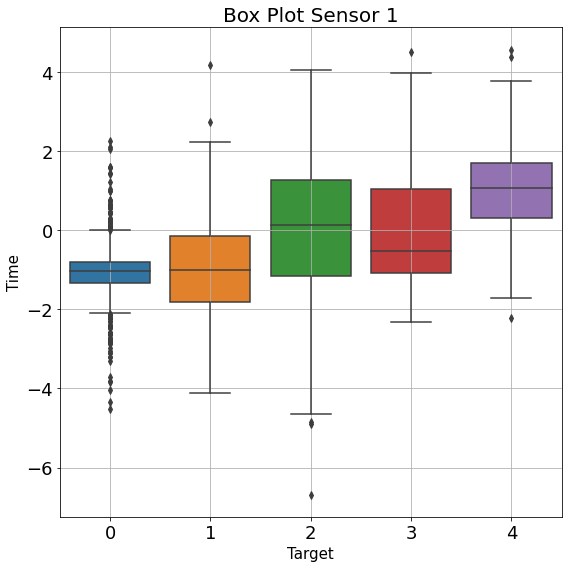

In [13]:
#We corroborate the outliers or atypical values for each Insect with respect to the Time column:

fig = plt.figure(figsize=(8,8))

sns.boxplot(x=df.target, y=df.sensor_1) # Boxplot

plt.title('Box Plot Sensor 1', fontsize=20)
plt.xlabel("Target",fontsize=15)
plt.ylabel("Time", fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



plt.tight_layout()
plt.grid()
plt.show()

As the graph clearly shows, we have many outliers that can influence our predictions. The boxplot allows us to easily see these values, as well as the quartiles that are the extremes of each box and the average that would be the line that divides each box.

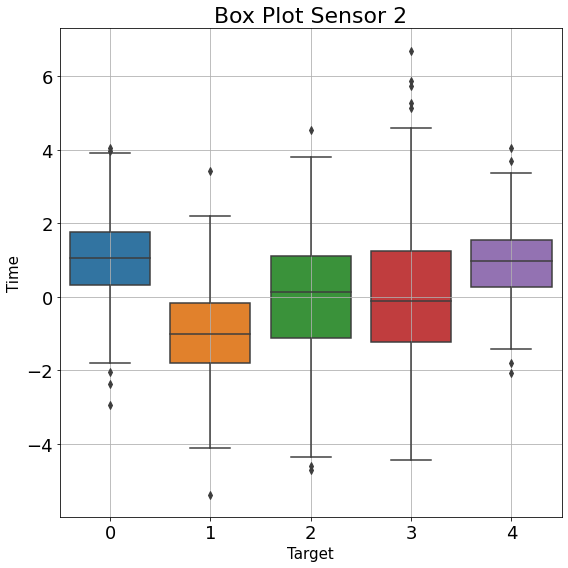

In [14]:
#Boxplot Sensor 2:
fig = plt.figure(figsize=(8,8))

sns.boxplot(x=df.target, y=df.sensor_2)

plt.title('Box Plot Sensor 2', fontsize=22)
plt.xlabel("Target",fontsize=15)
plt.ylabel("Time", fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.grid()
plt.show()

In [15]:
#DataSet Shape:
df.shape

(2100, 7)

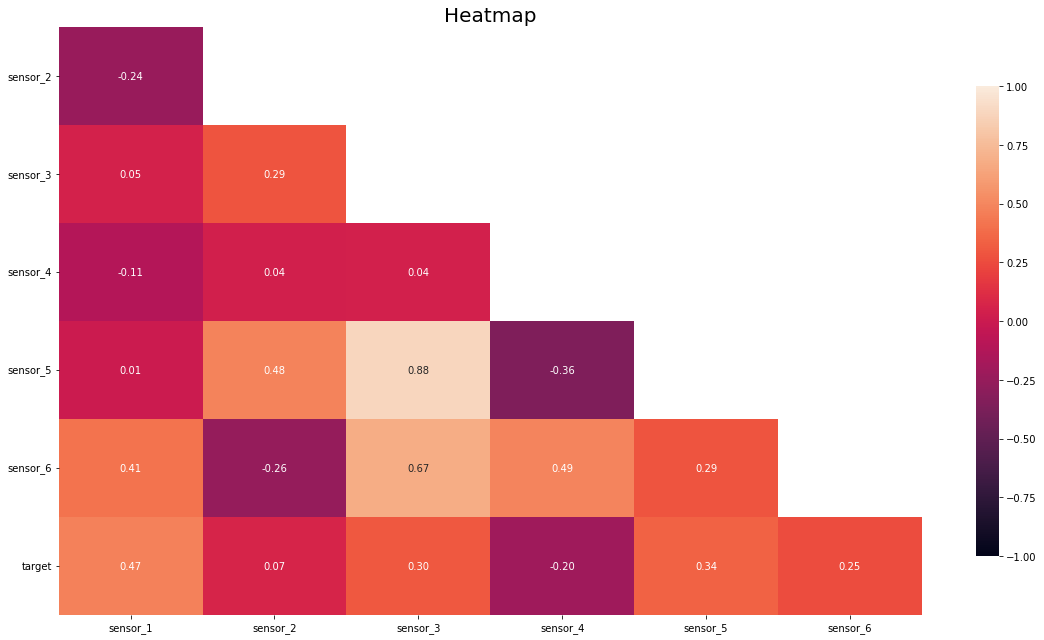

In [16]:
#Correlation between the variables:
corr = df.corr()
#Lets plot a HeatMap:
np.ones_like(corr, dtype=bool)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(corr, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = corr.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap",  fontsize=20)
plt.tight_layout()
plt.show()

This heat plot shows the correlation of our variables where the values can oscillate between -1 and 1, being positive correlation if it is greater than 0 or negative correlation if it is less than 0. Positive correlation means that when a value of our column increases, the columns with positive correlation on it will also increase, but if they have negative correlation when one value increases the other decreases.
We see that most of the sensors have a positive correlation, which means that when a value in one sensor increases the other increases as well, this gives us a good indication of how the variables interact with each other.

___

 ## Predictive Model
 
Having a clear understanding of the data we are going to work with, the data type of my columns, checking for null values, correlation of variables, etc. 

A machine learning Pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

The pipeline we will create will do the following: 

- To the categorical columns we will treat them with OneHotEncoder to binarize them and be able to apply them to the model.
- The numerical columns we will apply RobustScaler to normalize them and treat the outliers, once those steps are ready, with the column Transformer object we join those two steps and feed the model with the data. 
- RandomForesClassifier model to obtain the predictions.

The first pipeline we will create will have some parameters values, but we can also do it with the default values.
Then we will apply the GridSearch technique to find the best combination of hyperparameters for our model and modify our first pipeline with the optimized parameters.
Important! In this example we do not have columns with categorical variables but if we did they would be treated as announced in the pipeline preprocessing steps.

___

In [17]:
#Split the Dataset into two variables X and Y, and set aside our target variable.
X = df.drop(['target'], axis= 1)
y = df['target']

print(X.shape)
print(y.shape)

(2100, 6)
(2100,)


In [18]:
#We split the dataset in 2, Train and Test with the Sklearn library to train our model and then evaluate it:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

___
## Random Forest Classifier:

In [19]:
# Pre-processing
# ==============================================================================

# Identification categorical and numerical variables
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformation categorical variables
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

# Transformation numerical variables
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

#ColumnTransformer
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Mix the pre-processing step and the model in one Pipeline

pipe = Pipeline([('preprocessing', preprocessor),
                ('data_scaling',numeric_transformer),
                ('model', RandomForestClassifier(random_state = 42,
                                                criterion= 'gini',
                                                max_depth= 20, 
                                                min_samples_leaf = 3,
                                                min_samples_split = 4,
                                                n_estimators= 50))])

# ==============================================================================

# Fit the data
_ = pipe.fit(X=X_train, y=y_train)

# Predict the result:
pipe_pred = pipe.predict(X_test)

# ==============================================================================
# Model Evaluation:

print("Accuracy:",metrics.accuracy_score(y_test, pipe_pred))
# Precision: 
precision_pipe = precision_score(pipe_pred, y_test, average='macro')
print('Precision:', precision_pipe)
# Recall: 
recall_pipe = recall_score(pipe_pred, y_test, average='macro')
print('Recall:', recall_pipe)
# f1 score
f1_pipe = f1_score(pipe_pred, y_test, average='macro')
print('F1:', f1_pipe)

Accuracy: 0.7761904761904762
Precision: 0.7766645917626309
Recall: 0.7782838118281157
F1: 0.7770952385474637


In [20]:
#Plot the column diagram

set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['sensor_1', 'sensor_2', 'sensor_3',
                                  'sensor_4', 'sensor_5', 'sensor_6']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

___
### CrossValidation

In [21]:
# 5 cross-validation scores: "Random Forest CrossValidation"
pipe_cv = cross_val_score(pipe,X,y,cv=5, scoring='f1_macro',  error_score='raise' ) 

#Show The Values:
print(pipe_cv)
print("Average 5-Fold CV Score: {}".format(np.mean(pipe_cv)))
print('F1 First model:', f1_pipe)

[0.75615642 0.77039316 0.77185911 0.75221903 0.75632528]
Average 5-Fold CV Score: 0.7613905998597381
F1 First model: 0.7770952385474637


___
# GridSearch

In [22]:
# Change some hyperparameters to optimize the model and find the best ones:

parametros = { 'model__n_estimators': (10,20,30),
                'model__criterion': ('gini', 'entropy'),
                'model__max_depth': (20,30,40),
                'model__min_samples_leaf' : (3,6),
                'model__min_samples_split' : (4,8) }

pipe_grid = GridSearchCV(pipe, parametros,
                    cv=5,
                    scoring='f1_macro')           
#Fit the model
pipe_grid.fit(X_test, y_test)

#Predict after Grid Search:
pipe_pred_gs = pipe_grid.predict(X_test)

#Cross validation
#Random Forest after Grid Search
pipe_grid_cv = cross_val_score(pipe_grid,X,y,
                               cv=5,
                               scoring='f1_macro',
                               error_score='raise' ) 

print("Average 5-Fold CV Score: {}".format(np.mean(pipe_grid_cv)))

#=======================================================================

# Evaluate the model:

#Accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, pipe_pred_gs))

# Precision: 
precision_pipe_grid = precision_score(pipe_pred_gs, y_test, average='macro')
print('Precision:', precision_pipe_grid)

# Recall: 
recall_pipe_grid = recall_score(pipe_pred_gs, y_test, average='macro')
print('Recall:', recall_pipe_grid)

#F1 Macro:
f1_pipe_grid = f1_score(pipe_pred_gs, y_test, average='macro')
rf_best_params = pipe_grid.best_params_

print('F1 First model:', f1_pipe)
print('F1 Macro after Grid Search:', f1_pipe_grid)
print('Best Parameters: ', pipe_grid.best_params_)



Average 5-Fold CV Score: 0.7631569425012261
Accuracy: 0.9238095238095239
Precision: 0.9240730366220562
Recall: 0.9260951386478812
F1 First model: 0.7770952385474637
F1 Macro after Grid Search: 0.9245119063498686
Best Parameters:  {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4, 'model__n_estimators': 30}


___
### New Pipeline

In [23]:
# Pre-processing
# ==============================================================================

# Identification categorical and numerical variables
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformation categorical variables
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

# Transformation numerical variables
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

#ColumnTransformer
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Mix the pre-processing step and the model in one Pipeline

pipe = Pipeline([('preprocessing', preprocessor),
                ('data_scaling',numeric_transformer),
                ('model', RandomForestClassifier(random_state = 42,
                                                criterion= 'entropy',
                                                max_depth= 20, 
                                                min_samples_leaf = 3,
                                                min_samples_split = 4,
                                                n_estimators= 30))])

# ==============================================================================
# Fit the data
_ = pipe.fit(X=X_train, y=y_train)

#Predict the result:
pipe_pred = pipe.predict(X_test)

#Cross validation
#Random Forest Pipeline after Grid Search
pipe_grid_cv = cross_val_score(pipe_grid,X,y,
                               cv=5,
                               scoring='f1_macro',
                               error_score='raise' ) 

print("Average 5-Fold CV Score: {}".format(np.mean(pipe_grid_cv)))

#Evaluation:

print("Accuracy:",metrics.accuracy_score(y_test, pipe_pred))
# Precision: 
precision_pipe = precision_score(pipe_pred, y_test, average='macro')
print('Precision:', precision_pipe)
# Recall: 
recall_pipe = recall_score(pipe_pred, y_test, average='macro')
print('Recall:', recall_pipe)
# f1 score
f1_pipe = f1_score(pipe_pred, y_test, average='macro')
print('F1:', f1_pipe)

Average 5-Fold CV Score: 0.7631569425012261
Accuracy: 0.7714285714285715
Precision: 0.771990870422243
Recall: 0.772295374002691
F1: 0.7717036852701795


Once we modified our Pipeline with the best parameters we were able to improve our metrics a bit, especially our F1 macro, which at the beginning, when we used GridSearch had given us much higher than our cross validation, which we believe was quite underfitting - this refers to the failure of our model to generalize the knowledge we intend them to acquire.
We have finally obtained quite acceptable results after modifying the parameters.

___

In [24]:
#ConfusionMatrix:
cm_rf = confusion_matrix(y_test, pipe_pred_gs)

print(cm_rf)

[[76  5  2  2  0]
 [ 1 78  1  4  1]
 [ 0  4 78  2  0]
 [ 0  3  0 79  3]
 [ 2  1  0  1 77]]


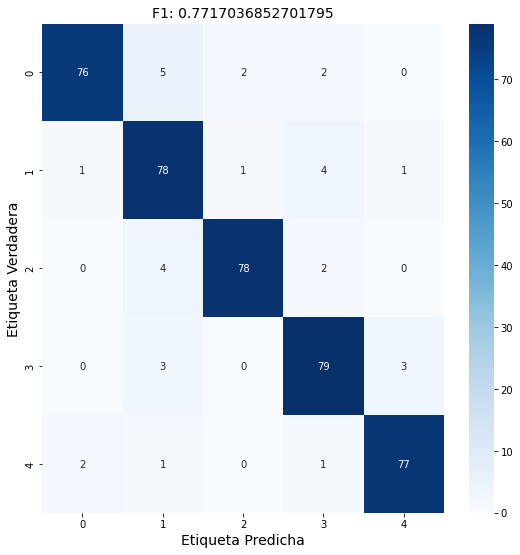

In [26]:
#Plot confusion Matrix:
plt.figure(figsize=(9,9))


ax = sns.heatmap(cm_rf, annot=True, fmt='', cmap='Blues')

title = 'F1: {0}'.format(f1_pipe)
ax.set_title(title, fontsize=14);


ax.set_xlabel('Etiqueta Predicha',fontsize=14)
ax.set_ylabel('Etiqueta Verdadera', fontsize=14);



##Show the matrix.
plt.show()

Here we can see that the main diagonal shows the model's success in classifying our target. While the other data correspond to what the algorithm predicted but was actually another type of turbulence.

___


___


## Sentiment analisis
### - Exercise 2: Take a text in English that you want, and calculate the frequency of the words

### Text :
"Data preparation can involve cleansing, aggregating, and manipulating it to be ready for specific types of processing. Analysis requires the development and use of algorithms, analytics and AI models. It’s driven by software that combs through data to find patterns within to transform these patterns into predictions that support business decision-making. The accuracy of these predictions must be validated through scientifically designed tests and experiments. And the results should be shared through the skillful use of data visualization tools that make it possible for anyone to see the patterns and understand trends"


___

### Sentence Tokenization

Sentence tokenizer breaks text paragraph into sentences.

In [27]:
text="""Data preparation can involve cleansing, aggregating, and manipulating it to be ready for specific types of processing. Analysis requires the development and use of algorithms, analytics and AI models. It’s driven by software that combs through data to find patterns within to transform these patterns into predictions that support business decision-making. The accuracy of these predictions must be validated through scientifically designed tests and experiments. And the results should be shared through the skillful use of data visualization tools that make it possible for anyone to see the patterns and understand trends."""


text_sent_token=sent_tokenize(text)
print(text_sent_token)

['Data preparation can involve cleansing, aggregating, and manipulating it to be ready for specific types of processing.', 'Analysis requires the development and use of algorithms, analytics and AI models.', 'It’s driven by software that combs through data to find patterns within to transform these patterns into predictions that support business decision-making.', 'The accuracy of these predictions must be validated through scientifically designed tests and experiments.', 'And the results should be shared through the skillful use of data visualization tools that make it possible for anyone to see the patterns and understand trends.']


### Word Tokenization
Word tokenizer breaks text paragraph into words.

In [28]:
#Tokenized text per word
text_word_token= word_tokenize(text)
print(text_word_token)

['Data', 'preparation', 'can', 'involve', 'cleansing', ',', 'aggregating', ',', 'and', 'manipulating', 'it', 'to', 'be', 'ready', 'for', 'specific', 'types', 'of', 'processing', '.', 'Analysis', 'requires', 'the', 'development', 'and', 'use', 'of', 'algorithms', ',', 'analytics', 'and', 'AI', 'models', '.', 'It', '’', 's', 'driven', 'by', 'software', 'that', 'combs', 'through', 'data', 'to', 'find', 'patterns', 'within', 'to', 'transform', 'these', 'patterns', 'into', 'predictions', 'that', 'support', 'business', 'decision-making', '.', 'The', 'accuracy', 'of', 'these', 'predictions', 'must', 'be', 'validated', 'through', 'scientifically', 'designed', 'tests', 'and', 'experiments', '.', 'And', 'the', 'results', 'should', 'be', 'shared', 'through', 'the', 'skillful', 'use', 'of', 'data', 'visualization', 'tools', 'that', 'make', 'it', 'possible', 'for', 'anyone', 'to', 'see', 'the', 'patterns', 'and', 'understand', 'trends', '.']


___

### Frequency Distribution
Frequency with which words are repeated in the text


In [82]:
#Frequency of words
fdist_word = FreqDist(text_word_token)
print(fdist_word)

<FreqDist with 69 samples and 102 outcomes>


In [30]:
#Frequency of the most common word in text
fdist_word.most_common(2)

[('and', 5), ('.', 5)]

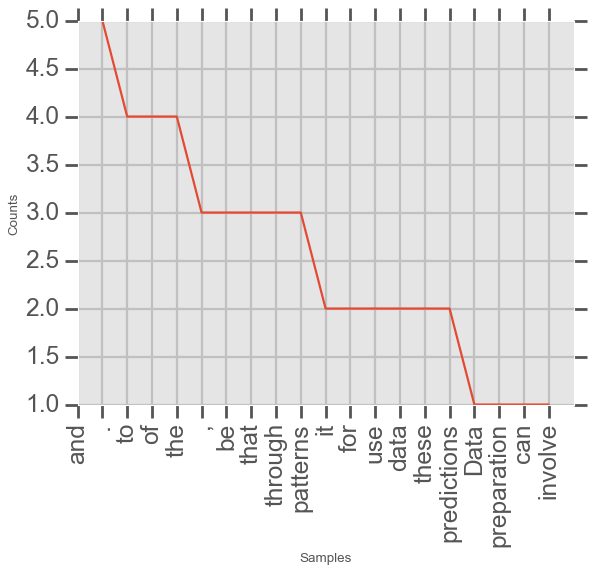

<Figure size 640x480 with 0 Axes>

In [76]:
# Frequency Distribution Plot
fdist_word.plot(20,cumulative=False)


plt.tight_layout()
plt.show()

This graph shows the ranking of words found in our text but as we can see here we have not yet filtered our stopwords so they are generating noise, later we will see how to remove them and clean our text.

___

### Stopwords
Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [32]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'me', 'up', 'your', 'ma', 'once', 'no', 'were', 'here', "shan't", "wouldn't", 'should', 'had', 'hers', 'while', 'then', 'have', 'it', 'nor', 'them', 'an', 'during', 'where', 'shan', 'why', "isn't", 'on', "you're", 'our', 'there', 'than', 'we', 'won', 'how', 'hasn', 'after', 'very', 'that', 'to', "you'd", 'his', 'these', 'or', "mustn't", 'him', 'any', 'further', 'ourselves', 'about', 'above', 're', 'who', 'he', 'what', "mightn't", 'such', "haven't", 'so', 'o', 'because', 's', 'through', 'until', 'each', 'only', 'm', 'didn', "won't", 'doing', 'himself', 'below', 'wouldn', "weren't", 'couldn', 'being', 'most', 'is', 'into', 've', 'before', 'other', 'y', 'as', 'from', "hasn't", 'wasn', 'herself', 'by', "she's", 'isn', 'yourselves', 'been', 'has', 'will', 'all', 'doesn', 'needn', 'yourself', 'their', 'themselves', 'did', 'don', 'the', "shouldn't", 'does', 'which', 'haven', 'in', 'shouldn', "you've", 'having', 'out', 'both', 'you', 'whom', 'few', 'too', "hadn't", 'mustn', 'theirs', 'do', 'u

### Removing Stopwords

In [33]:
# fuctions we are going to use in this project
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = text.replace("—","")
    text = re.sub('\[.*?¿\]\%-', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
#
def clean_text2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
         



In [34]:
#Function that clean the Stopwords

filtered_sent=[]

for sent in text_sent_token:
    sent_word_token = word_tokenize(sent)
    for word in sent_word_token:
        if word.lower() not in stop_words:
            filtered_sent.append(word)

print(filtered_sent)

['Data', 'preparation', 'involve', 'cleansing', ',', 'aggregating', ',', 'manipulating', 'ready', 'specific', 'types', 'processing', '.', 'Analysis', 'requires', 'development', 'use', 'algorithms', ',', 'analytics', 'AI', 'models', '.', '’', 'driven', 'software', 'combs', 'data', 'find', 'patterns', 'within', 'transform', 'patterns', 'predictions', 'support', 'business', 'decision-making', '.', 'accuracy', 'predictions', 'must', 'validated', 'scientifically', 'designed', 'tests', 'experiments', '.', 'results', 'shared', 'skillful', 'use', 'data', 'visualization', 'tools', 'make', 'possible', 'anyone', 'see', 'patterns', 'understand', 'trends', '.']


In [35]:
#Clean the non aphabetical caracters
filtered_sent = [character for character in filtered_sent if character.isalnum()]


In [36]:
#Frequency distribution of the clean sentece text

fdist_filter_sent = FreqDist(filtered_sent)
fdist_filter_sent

FreqDist({'patterns': 3, 'use': 2, 'data': 2, 'predictions': 2, 'Data': 1, 'preparation': 1, 'involve': 1, 'cleansing': 1, 'aggregating': 1, 'manipulating': 1, ...})

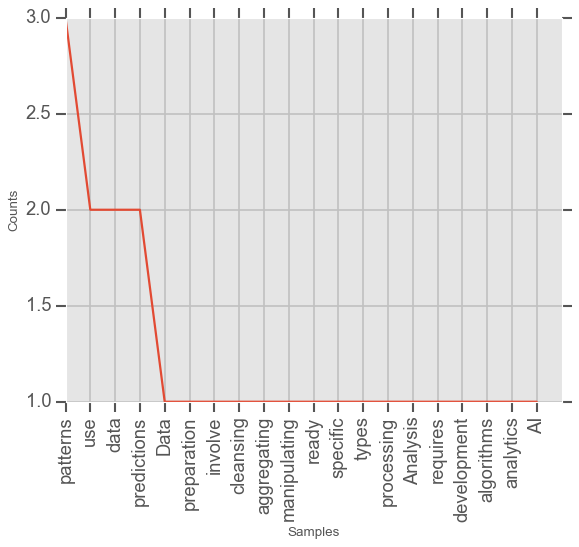

<Figure size 640x480 with 0 Axes>

In [68]:
# Frequency Distribution Plot
fdist_filter_sent.plot(20,cumulative=False)
plt.tight_layout()
plt.show()

In [51]:
df_filtered = pd.DataFrame([fdist_filter_sent])
df_filtered

,Data,preparation,involve,cleansing,aggregating,manipulating,ready,specific,types,processing,...,shared,skillful,visualization,tools,make,possible,anyone,see,understand,trends
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [70]:
#DataFrame with words and their frequency
df_filtered = pd.DataFrame.from_dict(fdist_filter_sent, orient='index').rename(columns={0:'Frequency'})
df_filtered.head()

,Frequency
Data,1
preparation,1
involve,1
cleansing,1
aggregating,1


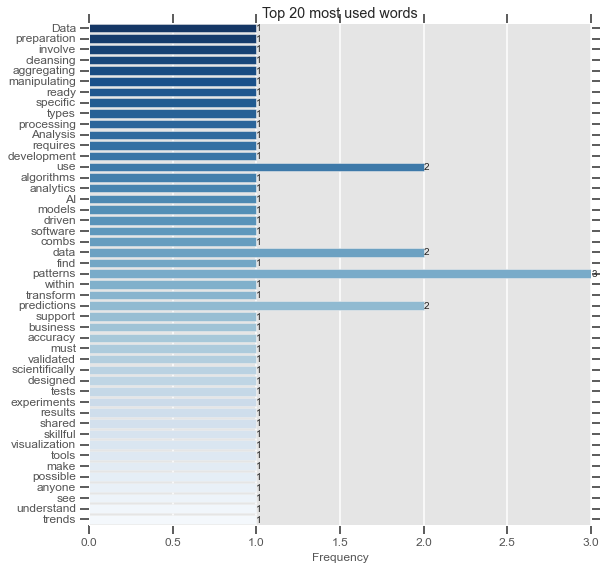

In [81]:
#keep 20 most used word in a diferent dataframe
data = df_filtered.nlargest(n=20, columns=['Frequency'], keep='all')

#create a plot with the 20 most used word
sns.set_context("talk")
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize =(9,9))
ax = sns.barplot(y=df_filtered.index, x="Frequency", data=df_filtered,palette="Blues_r",ax=ax)
ax.bar_label(ax.containers[0])
plt.title("Top 20 most used words")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

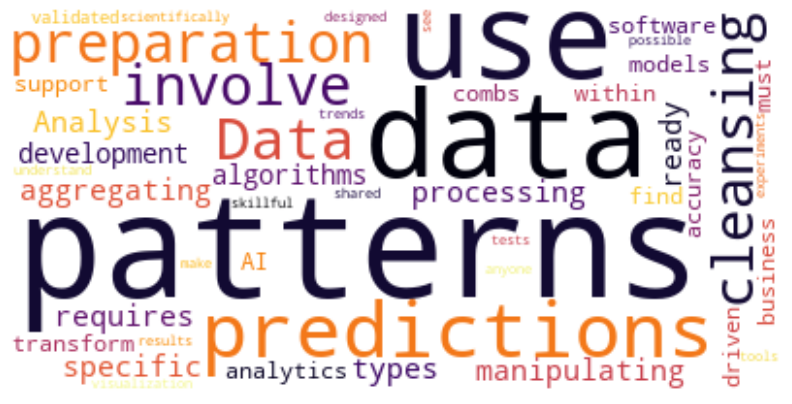

In [69]:
#Plot a wordcloud with the most used words

sns.set_context("poster")
plt.style.use('ggplot')
stop_words=set(stopwords.words("english"))
df_wordcloud = WordCloud(stopwords=stop_words,background_color="white",colormap='inferno',random_state=42).generate_from_frequencies(fdist_filter_sent)


fig, axes = plt.subplots(figsize =(10, 10))

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

As we can see in the graph the words that are more bigger is the word most used, in this case "Patterns".
This chart is easy understand and identifing the words most used.

___

Documentación:
- Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Grid Search Technique: https://scikit-learn.org/stable/modules/grid_search.html
- Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html
- Scikit Learn Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- NLTK Sentiment Analysis: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk